Mahi's Work

In [66]:
%matplotlib inline
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import statistics

In [76]:
from google.colab import files
uploaded = files.upload()

## Note

`cv2.imshow()` will not work in a notebook, even though the OpenCV tutorials use it. Instead, use `plt.imshow` and family to visualize your results.

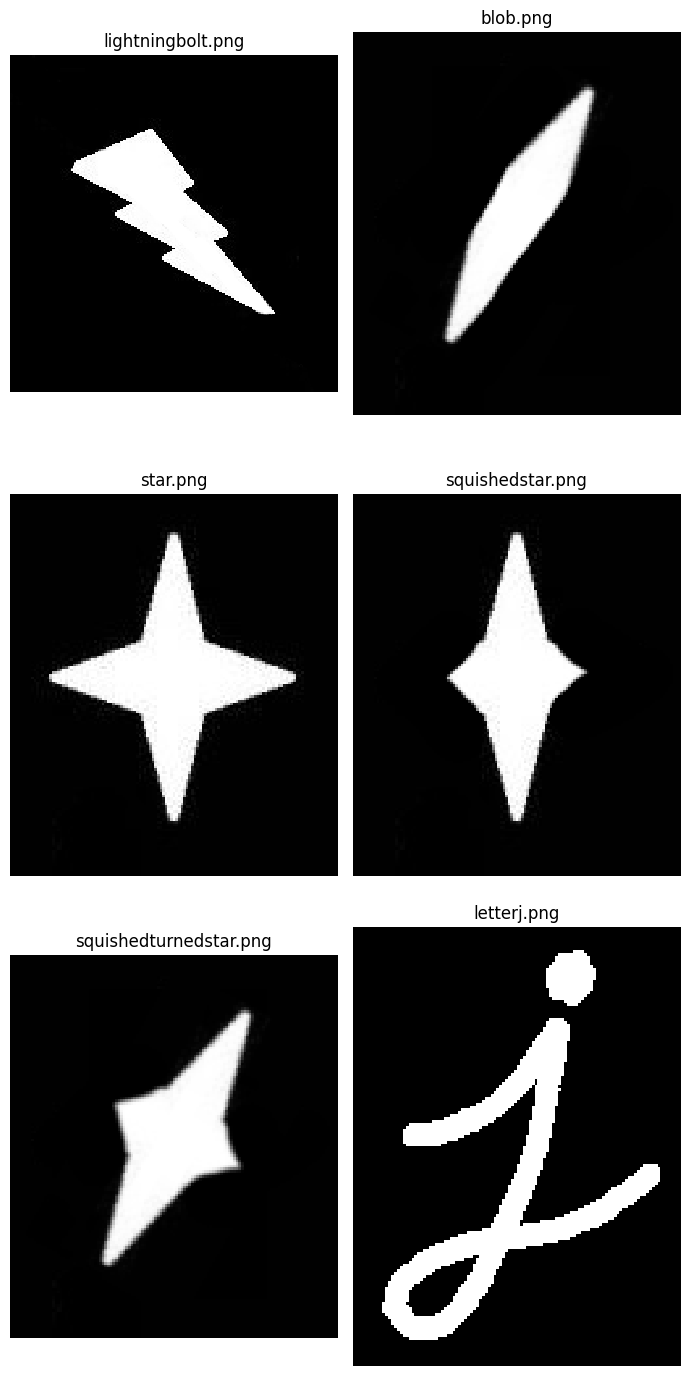

In [77]:
import matplotlib.pyplot as plt
import cv2
import os

# List of filenames (no 'shapes/' prefix needed)
image_paths = [
    'lightningbolt.png',
    'blob.png',
    'star.png',
    'squishedstar.png',
    'squishedturnedstar.png',
    'letterj.png'
]

# Load images safely
images = []
valid_paths = []
for path in image_paths:
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"❌ Error loading image: {path}")
    else:
        images.append(img)
        valid_paths.append(path)

# Display if all images loaded
if len(images) == len(image_paths):
    fig, ax = plt.subplots(nrows=3, ncols=2)
    fig.set_size_inches(7, 14)
    for a, img, title in zip(ax.flatten(), images, valid_paths):
        a.imshow(img, cmap='gray', interpolation='none')
        a.set_title(os.path.basename(title))
        a.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ One or more images failed to load. Please check the upload.")

In [78]:
lightningbolt, blob, star, squishedstar, squishedturnedstar, letterj = images

intensity_values = set(lightningbolt.flatten())
print(len(intensity_values))

75


## Question:

What would you expect the value to be, visually? What explains the actual value?

In [62]:
# TODO
# Visually, you would expect the value to be 255, because that's the "whitest" 8-bit possibility.
# However, the actual value is explained by the fact that lighting and other factors will
# rarely result in something that is *truly* white.

## Thresholding

https://docs.opencv.org/3.4.1/d7/d4d/tutorial_py_thresholding.html

2


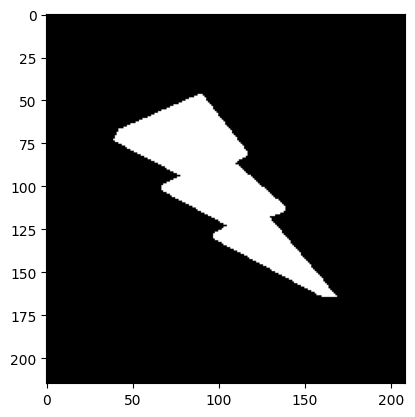

In [79]:
_, lightningbolt = cv2.threshold(lightningbolt,200,255,cv2.THRESH_BINARY)

intensity_values = set(lightningbolt.flatten())
print(len(intensity_values))

plt.imshow(lightningbolt, cmap='gray');

## Question
What happens when the above values are used for thresholding? What is a "good" value for thresholding the above images? Why?

In [64]:
## TODO
# All the pixel values from 201 - 255 (255) are assigned to white, and all the values 200
# and below are assigned to black (0). Basically, they make them black or white.

# Exercises

**Steps**

1. Read each tutorial
    * Skim all parts of each tutorial to understand what each operation does
    * Focus on the part you will need for the requested transformation
2. Apply the transformation and visualize it

## 1. Blend lightningbolt and blob together
https://docs.opencv.org/3.4.1/d0/d86/tutorial_py_image_arithmetics.html

*Remember:* Don't use `imshow` from OpenCV, use `imshow` from `matplotlib`

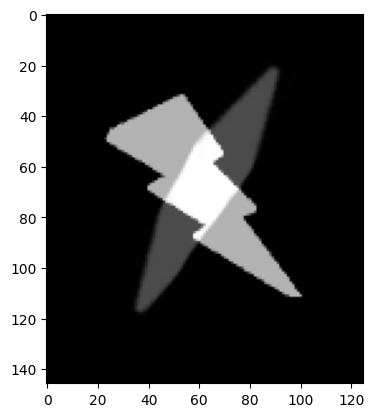

In [81]:
# 1. Blend
ht, wid = blob.shape
lightningmod = cv2.resize(lightningbolt, (wid,ht))

blend = cv2.addWeighted(lightningmod, 0.7, blob, 0.3, 0)

plt.imshow(blend, cmap='gray')

## 2. Find an ROI which contains the point of the lightning bolt

https://docs.opencv.org/3.4.1/d3/df2/tutorial_py_basic_ops.html

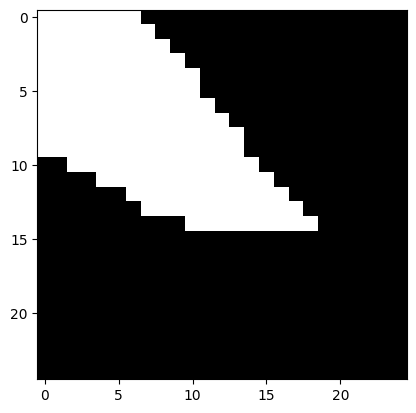

In [84]:
# 2. ROI
lb = lightningbolt[150:175, 150:175]
plt.imshow(lb, cmap='gray')

## 3. Use an averaging kernel on the letter j

https://docs.opencv.org/3.4.1/d4/d13/tutorial_py_filtering.html

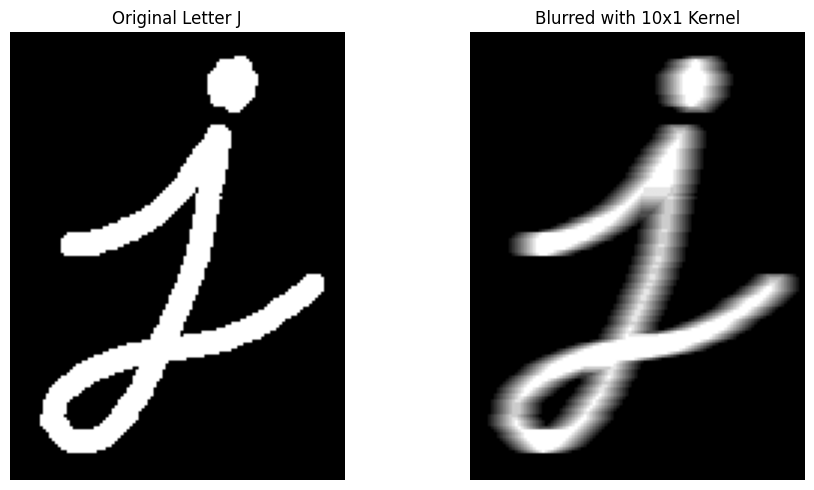

In [92]:
# 3.
# Assuming 'letterj' is the original grayscale image of the letter j
# If you previously stored it in `images[5]`, retrieve it like this:
letterj = images[5]

# Apply averaging kernel (3x3 is common)
blurred_j = cv2.blur(letterj, (10, 1))  # (kernel_width, kernel_height)

# Show original and blurred side-by-side
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(letterj, cmap='gray')
ax[0].set_title('Original Letter J')
ax[0].axis('off')

ax[1].imshow(blurred_j, cmap='gray')
ax[1].set_title('Blurred with 10x1 Kernel')
ax[1].axis('off')

plt.tight_layout()
plt.show()


# Morphology

https://docs.opencv.org/3.4.1/d9/d61/tutorial_py_morphological_ops.html

## 4. Perform erosion on j with a 3x3 kernel

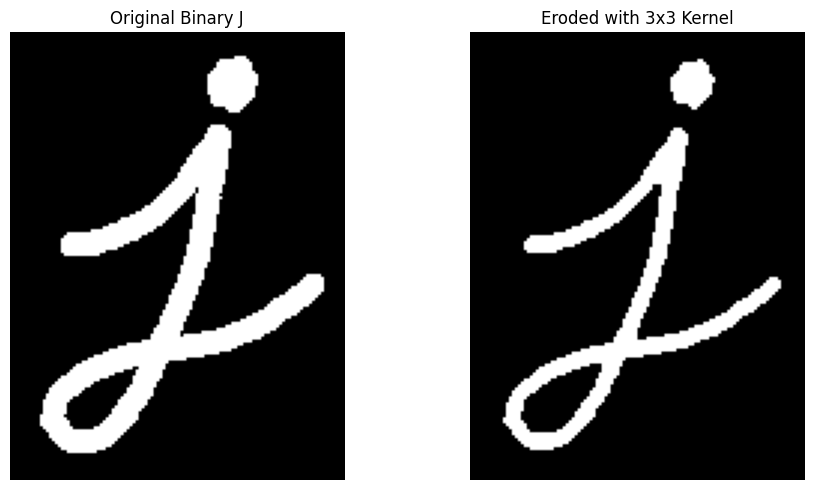

In [97]:
# 4
# Ensure the image is in binary form (if needed, apply threshold first)
_, binary_j = cv2.threshold(letterj, 127, 255, cv2.THRESH_BINARY)

# Create a 3x3 kernel
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Apply erosion
eroded_j = cv2.erode(binary_j, kernel, iterations=1)

# Display the original and eroded images
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(binary_j, cmap='gray')
ax[0].set_title('Original Binary J')
ax[0].axis('off')

ax[1].imshow(eroded_j, cmap='gray')
ax[1].set_title('Eroded with 3x3 Kernel')
ax[1].axis('off')

plt.tight_layout()
plt.show()

## 5. Perform erosion on j with a 5x5 kernel

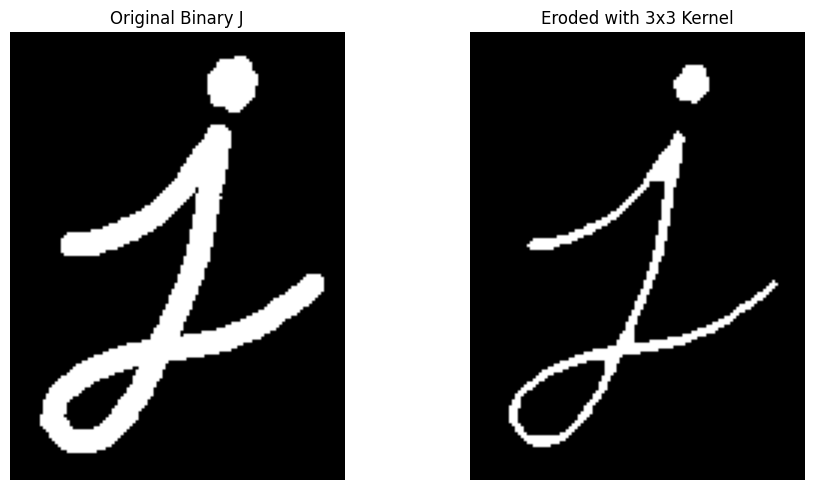

In [98]:
# 5
# Ensure the image is in binary form (if needed, apply threshold first)
_, binary_j = cv2.threshold(letterj, 127, 255, cv2.THRESH_BINARY)

# Create a 3x3 kernel
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

# Apply erosion
eroded_j = cv2.erode(binary_j, kernel, iterations=1)

# Display the original and eroded images
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(binary_j, cmap='gray')
ax[0].set_title('Original Binary J')
ax[0].axis('off')

ax[1].imshow(eroded_j, cmap='gray')
ax[1].set_title('Eroded with 3x3 Kernel')
ax[1].axis('off')

plt.tight_layout()
plt.show()


## 6. Perform erosion on j with __two__ iterations, using a kernel size of your choice

Hint: look at the OpenCV API documentation. It is possible to perform two iterations of erosion in one line of Python!

https://docs.opencv.org/3.4.1/d4/d86/group__imgproc__filter.html#gaeb1e0c1033e3f6b891a25d0511362aeb



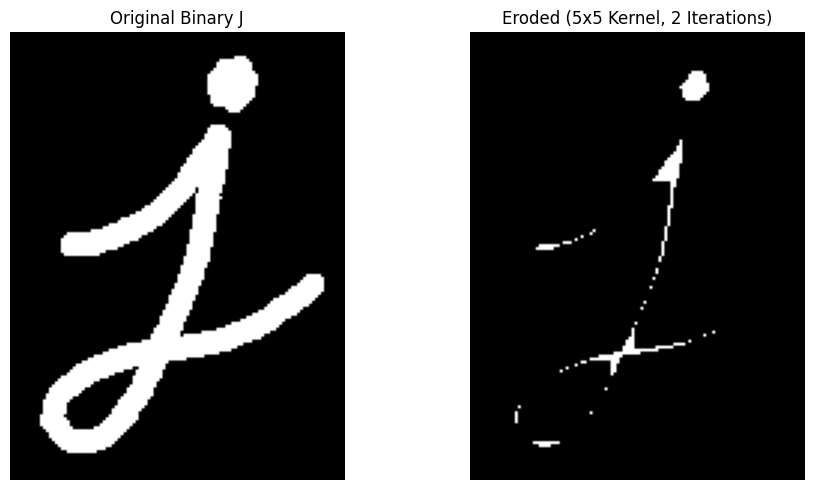

In [102]:
# 6
# Threshold to binary if needed
_, binary_j = cv2.threshold(letterj, 127, 255, cv2.THRESH_BINARY)

# Create a 5x5 rectangular kernel
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (4, 4))

# Perform erosion in one line with two iterations
eroded_j = cv2.erode(binary_j, kernel, iterations=2)

# Show original vs eroded
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(binary_j, cmap='gray')
ax[0].set_title('Original Binary J')
ax[0].axis('off')

ax[1].imshow(eroded_j, cmap='gray')
ax[1].set_title('Eroded (5x5 Kernel, 2 Iterations)')
ax[1].axis('off')

plt.tight_layout()
plt.show()

## 7. Perform dilation on j with a 3x3 kernel

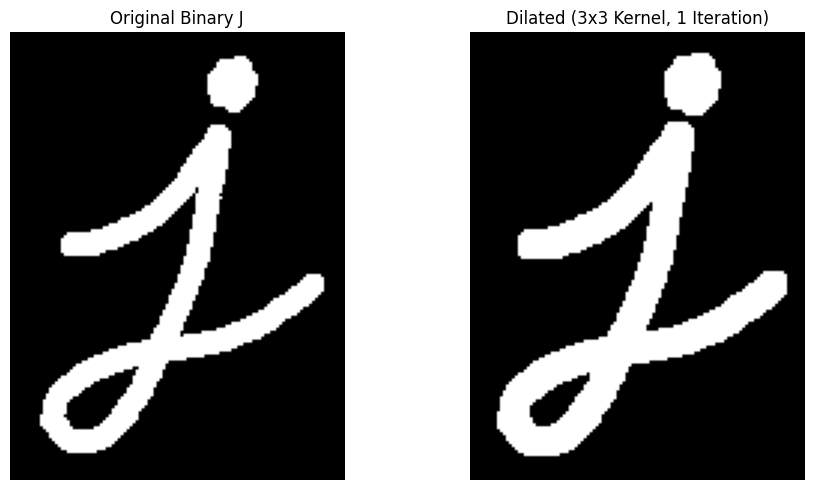

In [107]:
# 7
_, binary_j = cv2.threshold(letterj, 127, 255, cv2.THRESH_BINARY)

# Create a 3x3 kernel (can be any size)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Perform dilation
dilated_j = cv2.dilate(binary_j, kernel, iterations=1)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(binary_j, cmap='gray')
ax[0].set_title('Original Binary J')
ax[0].axis('off')

ax[1].imshow(dilated_j, cmap='gray')
ax[1].set_title('Dilated (3x3 Kernel, 1 Iteration)')
ax[1].axis('off')

plt.tight_layout()
plt.show()

## 8. Perform dilation on j with a 5x5 kernel

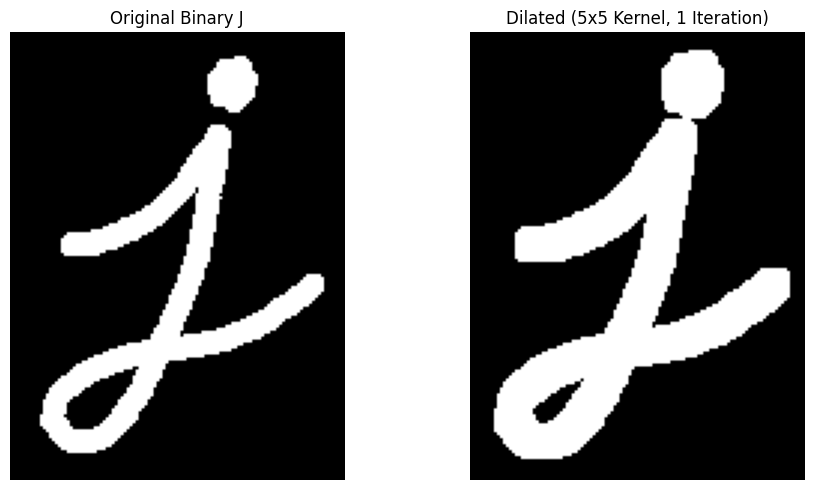

In [113]:
# 8
_, binary_j = cv2.threshold(letterj, 127, 255, cv2.THRESH_BINARY)

# Create a 3x3 kernel (can be any size)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

# (small, big) makes vertical dilation
# (big, small) makes horizontal dilation

# Perform dilation
dilated_j = cv2.dilate(binary_j, kernel, iterations=1)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(binary_j, cmap='gray')
ax[0].set_title('Original Binary J')
ax[0].axis('off')

ax[1].imshow(dilated_j, cmap='gray')
ax[1].set_title('Dilated (5x5 Kernel, 1 Iteration)')
ax[1].axis('off')

plt.tight_layout()
plt.show()

## 9. What is the effect of kernel size on morphology operations?

In [ ]:
# 9
# A small kernel would implement subtle changes but be more precise, keeping finer details intact.
# A larger kernel would have a stronger effect, with more visible but less precise changes.
# It might even erode/dilate too much, distorting the image beyond what was intended.

## 10. What is the difference betweeen repeated iterations of a morphology operation with a small kernel, versus a single iteration with a large kernel?

In [ ]:
# 10
# Implementing small kernels repeatedly will make small changes gradually, reshaping
# the image while also retaining details.
# However, larger kernels have a "wider" effect kinda, which means they might
# oversimplify the operations or lose out on the finer details.

## 11. Rotate the lightningbolt and star by 90 degrees

https://docs.opencv.org/3.4.1/da/d6e/tutorial_py_geometric_transformations.html

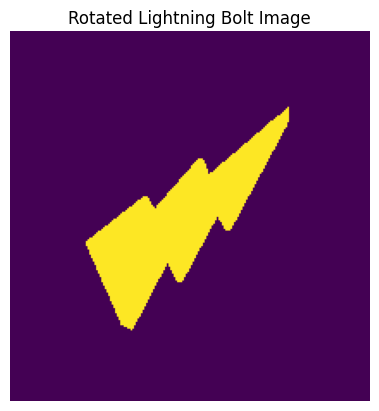

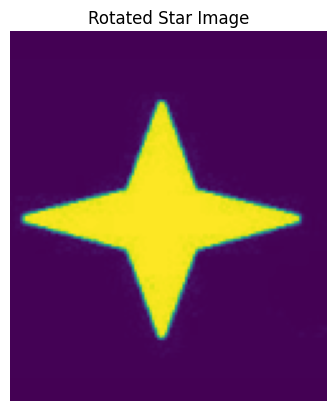

In [116]:
rows, cols = lightningbolt.shape[:2]
M = cv2.getRotationMatrix2D((cols / 2, rows / 2), 90, 1)
dst = cv2.warpAffine(lightningbolt, M, (cols, rows))

rows2, cols2 = star.shape[:2]
M2 = cv2.getRotationMatrix2D((cols2 / 2, rows2 / 2), 90, 1)
dst2 = cv2.warpAffine(star, M2, (cols2, rows2))

plt.imshow(dst)
plt.title('Rotated Lightning Bolt Image')
plt.axis('off')
plt.show()

plt.imshow(dst2)
plt.title('Rotated Star Image')
plt.axis('off')
plt.show()

## 12. STRETCH GOAL:

Visualize the result of Laplacian, Sobel X, and Sobel Y on all of the images. Also, produce a combined image of both Sobel X and Sobel Y for each image. Is Exercise 1 the best way to do this? Are there other options?

You should have 4 outputs (Laplacian, SobelX, SobelY, and the combination) for each input image visualized at the end.

https://docs.opencv.org/3.4.1/d5/d0f/tutorial_py_gradients.html

## When you are done:

You should have one or more images for each exercise.

1. Double-check that you filled in your name at the top of the notebook!
2. Click `File` -> `Export Notebook As` -> `PDF`
3. Email the PDF to `YOURTEAMNAME@beaver.works`